In [1]:
import pandas as pd
import numpy as np

In [3]:
#Load data

df = pd.read_csv('tasa_cambio_historica.csv')
print(df.head())
print(df.dtypes)
print(df.VIGENCIADESDE[0].split('/'))

     VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
0  2850.98    COP    09/10/2002    09/10/2002
1  2854.04    COP    10/10/2002    10/10/2002
2  2870.63    COP    11/10/2002    11/10/2002
3  2861.16    COP    12/10/2002    15/10/2002
4  2852.99    COP    16/10/2002    16/10/2002
VALOR            float64
UNIDAD            object
VIGENCIADESDE     object
VIGENCIAHASTA     object
dtype: object
['09', '10', '2002']


In [4]:
#Data cleaning

df.rename(columns={'VALOR': 'value', 'UNIDAD': 'currency', 'VIGENCIADESDE': 'valfrom', 'VIGENCIAHASTA': 'valuntil'}, inplace=True)

df['dayf'] = df['valfrom'].apply(lambda x: x.split('/')[0])
df['monthf'] = df['valfrom'].apply(lambda x: x.split('/')[1])
df['yearf'] = df['valfrom'].apply(lambda x: x.split('/')[2])
df['dayun'] = df['valuntil'].apply(lambda x: x.split('/')[0])
df['monthun'] = df['valuntil'].apply(lambda x: x.split('/')[1])
df['yearun'] = df['valuntil'].apply(lambda x: x.split('/')[2])

print(df.head())

     value currency     valfrom    valuntil dayf monthf yearf dayun monthun  \
0  2850.98      COP  09/10/2002  09/10/2002   09     10  2002    09      10   
1  2854.04      COP  10/10/2002  10/10/2002   10     10  2002    10      10   
2  2870.63      COP  11/10/2002  11/10/2002   11     10  2002    11      10   
3  2861.16      COP  12/10/2002  15/10/2002   12     10  2002    15      10   
4  2852.99      COP  16/10/2002  16/10/2002   16     10  2002    16      10   

  yearun  
0   2002  
1   2002  
2   2002  
3   2002  
4   2002  


In [5]:
#Eliminate some useless columns

df = df.drop(columns=['valfrom', 'valuntil'])
print(df.head())

     value currency dayf monthf yearf dayun monthun yearun
0  2850.98      COP   09     10  2002    09      10   2002
1  2854.04      COP   10     10  2002    10      10   2002
2  2870.63      COP   11     10  2002    11      10   2002
3  2861.16      COP   12     10  2002    15      10   2002
4  2852.99      COP   16     10  2002    16      10   2002


In [6]:
#Some summary statistics
print('The mean price of one dollar in Colombian Pesos is ' + str(df.value.mean()))
print('The median of one dollar in Colombian Pesos is ' + str(np.median(df.value)))
print('The standard deviation for the value column is ' + str(np.std(df.value)))
print('The first quartile is ' + str(np.quantile(df.value, 0.25)))
print('The second quartile is ' + str(np.quantile(df.value, 0.50)))
print('The third quartile is ' + str(np.quantile(df.value, 0.75)))
print('The Interquartile Range is ' + str(np.quantile(df.value, 0.75) - np.quantile(df.value, 0.25)))

The mean price of one dollar in Colombian Pesos is 2065.444562845402
The median of one dollar in Colombian Pesos is 2025.71
The standard deviation for the value column is 802.9946902022256
The first quartile is 1568.54
The second quartile is 2025.71
The third quartile is 2676.41
The Interquartile Range is 1107.87


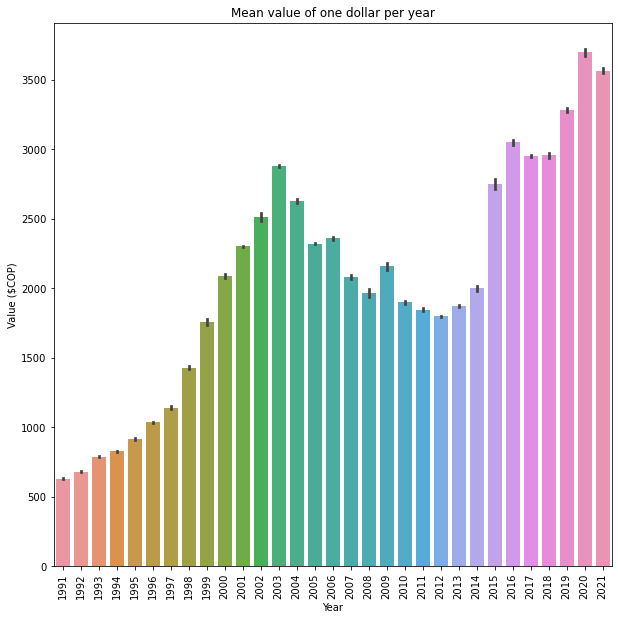

<Figure size 432x288 with 0 Axes>

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.barplot(data=df, x='yearf', y='value')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Year')
plt.ylabel('Value ($COP)')
plt.title('Mean value of one dollar per year')
plt.show()
plt.clf()

620.62
4153.91


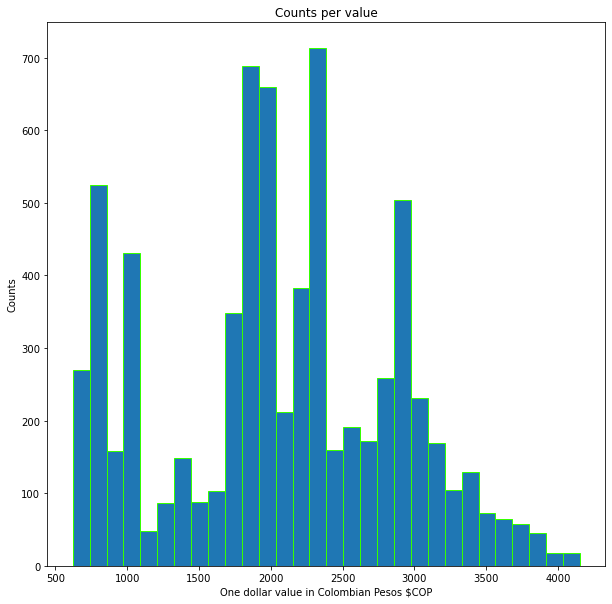

<Figure size 432x288 with 0 Axes>

In [8]:
#Histogram for value distribution

print(np.min(df.value))
print(np.max(df.value))

plt.figure(figsize=(10,10))
plt.hist(df.value, bins=30, edgecolor='#36FF00')
plt.title('Counts per value')
plt.ylabel('Counts')
plt.xlabel('One dollar value in Colombian Pesos $COP')
plt.show()
plt.clf()

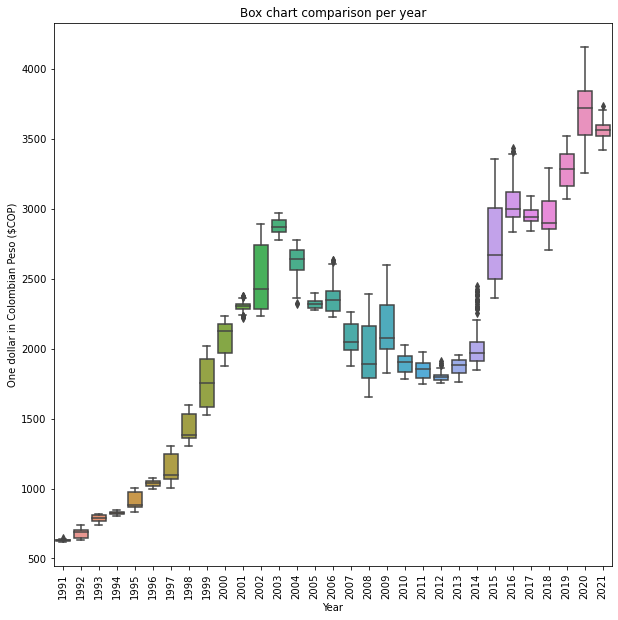

In [9]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.boxplot(data=df, x='yearf', y='value')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Box chart comparison per year')
plt.xlabel('Year')
plt.ylabel('One dollar in Colombian Peso ($COP)')
plt.show()

In [110]:
#Try to predict the value using the date as input
#Cluster K-Neighbors Supervised Machine Learning

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

classifier = KNeighborsRegressor()
scaler = StandardScaler()

data = df[['dayf', 'monthf', 'yearf']]
stan_data_x = scaler.fit_transform(data)
labels = df.value

x_train, x_test, label_train, label_test = train_test_split(stan_data_x, labels, train_size=0.8, test_size=0.2, random_state = 6)
classifier.fit(x_train, label_train)

print(classifier.score(x_test, label_test))
d = np.array([5,4,2021]).reshape(1,-1)

print('La predicción es', classifier.predict(d))


0.949754493239986
La predicción es [3629.376]


In [109]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['dayf', 'monthf', 'yearf']]
y = df['value']
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

regression = LinearRegression()
regression.fit(train_x,train_y)
print(regression.score(test_x, test_y))

print(regression.predict([[5, 4, 2021]]))

0.6402373064838403
[3194.54051169]
